2022-11-04 18:22:19.122245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 18:22:19.122291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-04 18:22:36.192902: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-04 18:22:36.192935: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jishnu): /proc/driver/nvidia/version does not exist
2022-11-04 18:22:36.294664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To 

1/1 [==============================] - 1s 1s/step


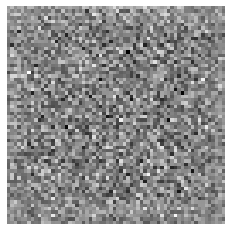

In [1]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0],cmap='gray')
	pyplot.show()

# load model
model = load_model('generator_model_100.h5')
# generate images
latent_points = generate_latent_points(100, 1)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 1)

In [3]:
X

array([[[[0.50049895],
         [0.50005245],
         [0.4998756 ],
         ...,
         [0.49893874],
         [0.49972212],
         [0.4986028 ]],

        [[0.500014  ],
         [0.5003248 ],
         [0.5002331 ],
         ...,
         [0.49975726],
         [0.4987103 ],
         [0.49846348]],

        [[0.50170845],
         [0.5011811 ],
         [0.50054497],
         ...,
         [0.5002231 ],
         [0.5014798 ],
         [0.49835822]],

        ...,

        [[0.4985958 ],
         [0.49974996],
         [0.50050074],
         ...,
         [0.5001271 ],
         [0.4992309 ],
         [0.49970204]],

        [[0.49882683],
         [0.5011103 ],
         [0.49896705],
         ...,
         [0.49876276],
         [0.49847075],
         [0.49765545]],

        [[0.49915606],
         [0.4997636 ],
         [0.49760345],
         ...,
         [0.49852934],
         [0.49960005],
         [0.50012875]]],


       [[[0.501209  ],
         [0.5020958 ],
         [0.50

In [19]:
Y=X.reshape(16,64,64)
Y[0]

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
# Efficient Python code for check a matrix is
# symmetric or not.

import networkx as nx

# def convert_matrix(mat, N):
#     for i in range(N):
#         for j in range(N):
#             if(mat[i][j]>=0.5):
#                 mat[i][j]=1
#             else:
#                 mat[i][j]=0
#     return mat

# Y=convert_matrix(Y[0],64)
average=0
for i in range(16):
    Y=nx.from_numpy_array(Y[i])
    apl=nx.average_shortest_path_length(Y)
    acc=nx.average_clustering(Y)
    average_apl+=apl

print(apl,acc)

1.5128968253968254 0.49821773063008046
